<a href="https://colab.research.google.com/github/jatinray99/LaptopFactoryproject/blob/main/LaptopFactoryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data Loading

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/mindfactory_updated.csv')
data

,name,price_eur,display_inch,display_cm,display_resolution,display_ratio,weight_kg,height_mm,width_mm,depth_mm,...,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,bluetooth_version,wifi_standard,product_ean,product_sku,release_year,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,16:9,1.29,16.1,304.1,212.4,...,True,False,True,True,5.0,Wi-Fi 6 (802.11ax),1.942521e+11,MGN63D/A,2020.0,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,16:9,2.80,20.1,397.6,283.5,...,True,True,True,True,5.3,Wi-Fi 6E (802.11ax),4.711377e+12,0017P2-013,NaN,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,NaN,1.60,17.9,314.0,227.5,...,True,False,True,True,5.2,Wi-Fi 6E (802.11ax),4.719073e+12,0014F1-049,NaN,Notebooks
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,NaN,4.719332e+12,AORUS 15 9KF-E3DE383SH,NaN,Notebooks
4,Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...,354.97,15.6,39.6,1920x1080,NaN,1.95,23.9,361.0,244.0,...,False,True,True,True,5.1,Wi-Fi 6E (802.11ax),4.065221e+12,FPC04902BS,NaN,Notebooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Apple Macbook PRO 16 M2 PRO 12C/19C 16GB RAM 5...,2729.64,16.2,41.1,3456x2234,NaN,2.15,16.8,355.7,248.1,...,True,False,True,True,5.3,Wi-Fi 6E (802.11ax),1.942533e+11,MNW83D/A,2023.0,Notebooks
760,Apple MacBook Air Z15T Apple M2 8C CPU/10C GPU...,2182.57,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,NaN,4.066582e+12,MLXX3D/A-Z08762971,NaN,Notebooks
761,Microsoft Notebook Surface Laptop Go 2 - i5/ 4...,803.79,12.4,31.5,1536x1024,3:2,1.13,15.7,278.2,206.2,...,True,False,True,True,5.1,Wi-Fi 6 (802.11ax),8.898429e+11,L1D-00005,NaN,Notebooks
762,LG Electronics GRAM 16T90Q-G.AP79G i7 W11P FHD...,1447.97,16.0,40.6,2560x1600,16:10,1.48,16.9,356.6,248.3,...,True,True,True,True,5.1,Wi-Fi 6E (802.11ax),8.806092e+12,16T90Q-G.AP79G,NaN,Notebooks


In [4]:
#Visulaing the data in scatter plot

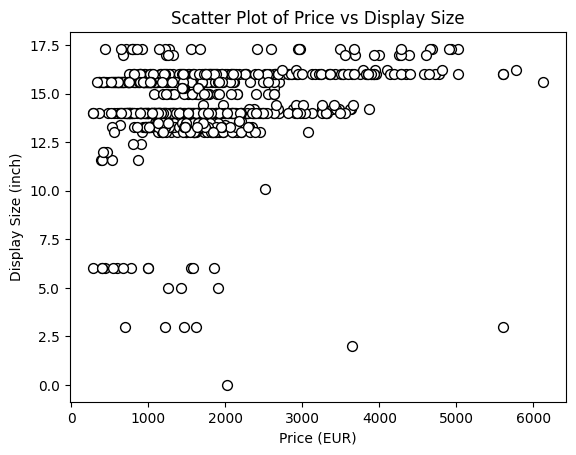

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Choose two numerical columns for the scatter plot, for example, 'price_eur' and 'display_inch'
selected_columns = ['price_eur', 'display_inch']

# Drop rows with missing values in the selected columns
data_selected = data[selected_columns].dropna()

# Plot the data
plt.scatter(data_selected['price_eur'], data_selected['display_inch'], c='white', edgecolor='black', marker='o', s=50)
plt.xlabel('Price (EUR)')
plt.ylabel('Display Size (inch)')
plt.title('Scatter Plot of Price vs Display Size')
plt.show()


In [6]:
#Data Cleaning

In [7]:
x = data.iloc[:, 2]
y=data.iloc[:,1]
x
data.dropna()
x.dropna()
y.dropna()

0       912.99
1      4680.23
2      1651.12
3      1087.38
4       354.97
        ...   
759    2729.64
760    2182.57
761     803.79
762    1447.97
763    1187.74
Name: price_eur, Length: 764, dtype: float64

In [8]:
#Data Preprocessing

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

#  you can impute the missing values
# Use 'mean' or 'median' strategy based on your preference
imputer = SimpleImputer(strategy='median')

# Convert the Series to a NumPy array and reshape if it's 1D
if x.ndim == 1:
    x = x.values.reshape(-1, 1)

x_imputed = imputer.fit_transform(x)

In [10]:
#KMeans Clustering

In [11]:
# Now, apply KMeans clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', max_iter=100, n_init=10)
y_km = km.fit_predict(x_imputed)

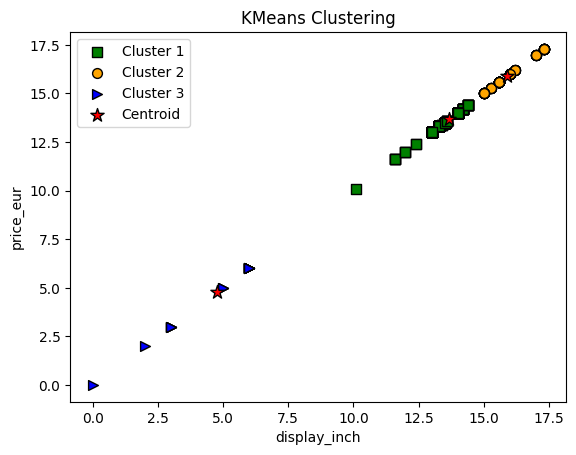

In [12]:
import matplotlib.pyplot as plt

# Scatter plot for Cluster 1
plt.scatter(x[y_km == 0], x[y_km == 0], s=50, c='green', marker='s', edgecolor='black', label='Cluster 1')

# Scatter plot for Cluster 2
plt.scatter(x[y_km == 1], x[y_km == 1],s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')

# Scatter plot for Cluster 3
plt.scatter(x[y_km == 2], x[y_km == 2],s=50, c='blue', marker='>', edgecolor='black', label='Cluster 3')

# Scatter plot for Centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 0],s=100, c='red', marker='*', edgecolor='black', label='Centroid')

plt.legend()
plt.xlabel('display_inch')
plt.ylabel('price_eur')
plt.title('KMeans Clustering')
plt.show()


In [13]:
print(x.shape, y_km.shape)

(764, 1) (764,)


In [14]:
#DBSCAN

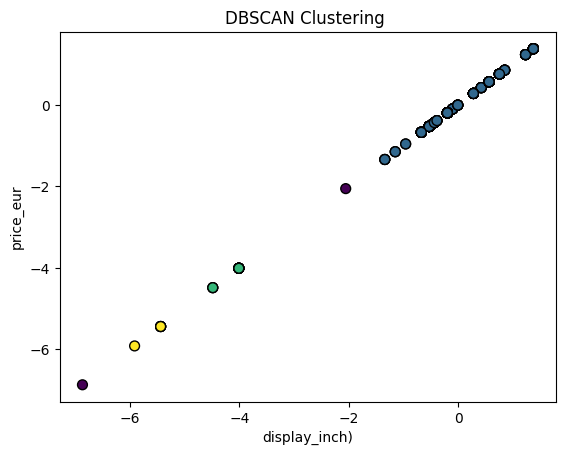

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'x_imputed' is your data after imputation and KMeans clustering
# Use StandardScaler to standardize the data for DBSCAN
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(x_scaled)

# Visualize the results
plt.scatter(x_scaled[:, 0], x_scaled[:, 0], c=y_dbscan, cmap='viridis', marker='o', s=50, edgecolor='black')
plt.title('DBSCAN Clustering ')
plt.xlabel('display_inch)')
plt.ylabel('price_eur')
plt.show()


In [16]:
#Linear Regression

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'x' and 'y' are your input features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Reshape the data to 2D arrays
x_train_2d = np.array(x_train).reshape(-1, 1)
x_test_2d = np.array(x_test).reshape(-1, 1)

In [18]:
# Impute missing values in input features
imputer_x = SimpleImputer(strategy='median')
x_train_imputed = imputer_x.fit_transform(x_train_2d)
x_test_imputed = imputer_x.transform(x_test_2d)

# Impute missing values in target variable
imputer_y = SimpleImputer(strategy='median')
y_train_imputed = imputer_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_imputed = imputer_y.transform(np.array(y_test).reshape(-1, 1))

In [19]:
# Create and fit the model
model = LinearRegression()
model.fit(x_train_imputed, y_train_imputed)


LinearRegression()

In [20]:
# Make predictions
y_pred = model.predict(x_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1029048.8914561595
R^2 Score: -0.006316823777867908


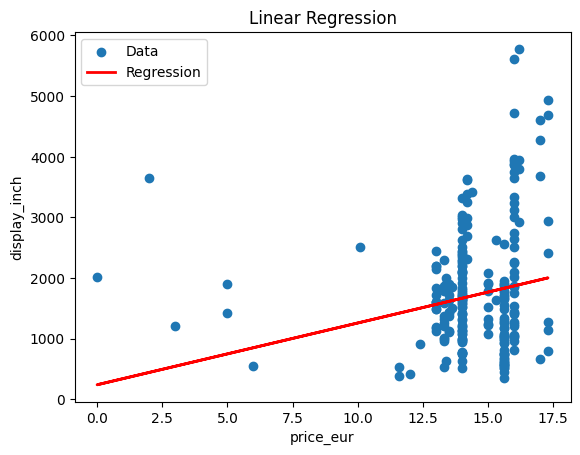

In [21]:
import matplotlib.pyplot as plt

# Assuming x_test is your test set
plt.scatter(x_test, y_test_imputed, label='Data')
plt.plot(x_test, y_pred, label='Regression', c='r', lw=2)
plt.legend()
plt.xlabel('price_eur')
plt.ylabel('display_inch')
plt.title('Linear Regression')
plt.show()
